# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [15]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt
# I modify the source link of test.dat to make sure train.dat and test.dat have same columns to run the perceptron

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  58604      0 --:--:-- --:--:-- --:--:-- 58813']

In [16]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [43]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(weights, instance):
    #TODO: Return dot product of array 1 and array 2
    # instance=[A0 A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13 label]
    # we only use A0 to A13 to do dot product
    result=0
    for a1,a2 in zip(weights,instance[:-1]):
      tmp=a1*a2
      result+=tmp

    return result


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    in_value = dot_product(weights, instance)
    output = sigmoid(in_value)
    return output

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    result=output(weights, instance)
    if result >=0.5:
      return 1
    else:
      return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # initialize weights with zero values
    weights = [0] * (len(instances[0])-1)
    # print('initialization weights:',weights)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # to sum up original data and its weight
            in_value = dot_product(weights, instance)
            # to activate in_value
            output = sigmoid(in_value)
            # to compare the predicted output with corresponding label, get how
            # difference it is between them
            error = instance[-1] - output
            #TODO: name these steps
            # iterate all weights to update them according to one instance
            for i in range(0, len(weights)):
                # use the gradient of weights to update corresponding weight
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

In [26]:
instances_tr = read_data("train.dat")
print(instances_tr)
print(dot_product(instances_tr[0],instances_tr[1]))
print(sum(a * b for a, b in zip(instances_tr[0],instances_tr[1])))
weights = [0] * (len(instances_tr[0])-1)
print(weights,len(weights))
print(instances_tr[0])
print(instances_tr[0][:-1])

[[-1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], [-1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0], [-1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1], [-1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0], [-1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0], [-1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1], [-1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [-1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0], [-1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], [-1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], [-1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], [-1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0], [-1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1], [-1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0], [-1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], [-1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1], [-1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], [-1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], [-1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], [-1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0], [-1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1

## Run it

In [41]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
print('after train weights:',weights)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

initialization weights: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
after train weights: [0.19467441594729673, -0.04556779025352943, -0.07298282989725792, -0.05672949341520093, -0.06044937376069533, -0.11712938497604504, -0.10269362159600408, -0.17997715498664454, -0.06636358047339574, -0.014607431359386623, -0.022979728863794166, 0.05902086549351479, -0.14934958215587596, -0.19467441594729673]
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
It would only do a linear transformation without sigmoid activation function.

It only learn the linear relationship in data even if it is not.

Adding a sigmoid activation function can extend its ability to learn complex patterns in data




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)

code
```
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
```
output
```
#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
#tr: 40, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
#tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
```

In [46]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

result={}


for lr in lr_array:
  result[lr]={}
  for tr_size in tr_percent:
    result[lr][tr_size]=[]
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      result[lr][tr_size].append(accuracy)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)
- A. Yes, according the results and the figure below, when training with all data, most of results can get highest accuracy
- B. Second one use relatively smaller learning rate 0.005. The smaller learning rate can cause the model to converge more slowly even if training data is bigger.
- C. In the last codes section, I have tried different hyperparameters and initialize random weights, but still cannot get higher than 80.0
- D. Yes, in the figure below, when epochs increase, accuracy often increase


{0.005: {5: [68.0, 68.0, 68.0, 68.0, 68.0], 10: [68.0, 68.0, 68.0, 68.0, 68.0], 25: [68.0, 68.0, 68.0, 68.0, 68.0], 50: [68.0, 68.0, 68.0, 67.0, 74.0], 75: [68.0, 68.0, 68.0, 74.0, 78.0], 100: [68.0, 68.0, 69.0, 73.0, 77.0]}, 0.01: {5: [68.0, 68.0, 68.0, 68.0, 68.0], 10: [68.0, 68.0, 68.0, 68.0, 68.0], 25: [68.0, 68.0, 68.0, 68.0, 71.0], 50: [68.0, 68.0, 68.0, 74.0, 78.0], 75: [68.0, 68.0, 70.0, 78.0, 80.0], 100: [68.0, 69.0, 70.0, 77.0, 80.0]}, 0.05: {5: [68.0, 68.0, 68.0, 68.0, 64.0], 10: [68.0, 68.0, 68.0, 71.0, 69.0], 25: [68.0, 67.0, 70.0, 74.0, 77.0], 50: [71.0, 77.0, 78.0, 78.0, 76.0], 75: [74.0, 78.0, 79.0, 78.0, 77.0], 100: [69.0, 76.0, 80.0, 80.0, 80.0]}}


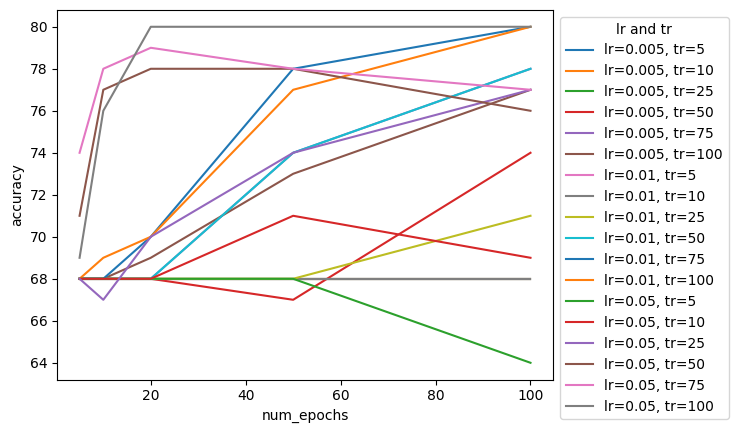

In [65]:
import matplotlib.pyplot as plt
import numpy as np

tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

print(result)

for lr in lr_array:
    for tr in tr_percent:
        accuracy = [result[lr][tr][i] for i in range(len(num_epochs))]
        plt.plot(num_epochs, accuracy, label=f'lr={lr}, tr={tr}')

plt.xlabel('num_epochs')
plt.ylabel('accuracy')
plt.legend(title="lr and tr", bbox_to_anchor=(1, 1))
plt.show()

In [82]:
import random

def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # initialize weights with zero values
    # weights = [0.01] * (len(instances[0])-1)
    # initialize random weights
    weights = [random.randint(1, 100000)/100000.0 for _ in range(len(instances[0])-1)]
    # print('initialization weights:',weights)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            # to sum up original data and its weight
            in_value = dot_product(weights, instance)
            # to activate in_value
            output = sigmoid(in_value)
            # to compare the predicted output with corresponding label, get how
            # difference it is between them
            error = instance[-1] - output
            #TODO: name these steps
            # iterate all weights to update them according to one instance
            for i in range(0, len(weights)):
                # use the gradient of weights to update corresponding weight
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [100] # percent of the training dataset to train with
num_epochs = [100, 200,300,400,500,1000,2000,10000]     # number of epochs
lr_array = [0.005, 0.01, 0.02,0.03,0.04,0.05,0.1]        # learning rate


for lr in lr_array:
  result[lr]={}
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"initialize random weights #tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

initialize random weights #tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
initialize random weights #tr: 400, epochs: 200, learning rate: 0.005; Accuracy (test, 100 instances): 79.0
initialize random weights #tr: 400, epochs: 300, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 400, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 500, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 1000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 2000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 10000, learning rate: 0.005; Accuracy (test, 100 instances): 80.0
initialize random weights #tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 79.0
initialize random weight